In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data  = {
    'text': ['This is good', 'I love it', 'Rediculous', 'Bad experience', 'Not Good', 'Worst ever', 'Fantastic!'],
    'label': [1, 1, 0, 0, 0, 0, 1]
}
print(data)

{'text': ['This is good', 'I love it', 'Rediculous', 'Bad experience', 'Not Good', 'Worst ever', 'Fantastic!'], 'label': [1, 1, 0, 0, 0, 0, 1]}


In [5]:
df = pd.DataFrame(data)

In [6]:
df

,text,label
0,This is good,1
1,I love it,1
2,Rediculous,0
3,Bad experience,0
4,Not Good,0
5,Worst ever,0
6,Fantastic!,1


In [7]:
# vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()

In [10]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.50620239,
       0.60981929, 0.        , 0.        , 0.        , 0.        ,
       0.60981929, 0.        ])

In [12]:
# dimensionality reduction using PCA or TSNE
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)

In [13]:
x_pca

array([[ 6.63039497e-01,  8.01782607e-17],
       [-2.65215799e-01, -6.14433128e-01],
       [-2.65215799e-01, -1.12119163e-01],
       [-2.65215799e-01,  6.84620658e-01],
       [ 6.63039497e-01, -2.58629898e-16],
       [-2.65215799e-01, -2.43908351e-01],
       [-2.65215799e-01,  2.85839983e-01]])

In [16]:
p_value = min(30, X.shape[0] // 3)
p_value

2

In [17]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity = p_value)
x_tsne = tsne.fit_transform(X)

In [22]:
x_tsne.shape

(7, 2)

In [21]:
x_tsne[:,0] # as x value
x_tsne[:,1] # as y value

array([  361.86133, -1378.0809 ,   543.95056,  1601.4766 ,   361.86133,
        -987.31085,  -612.30554], dtype=float32)

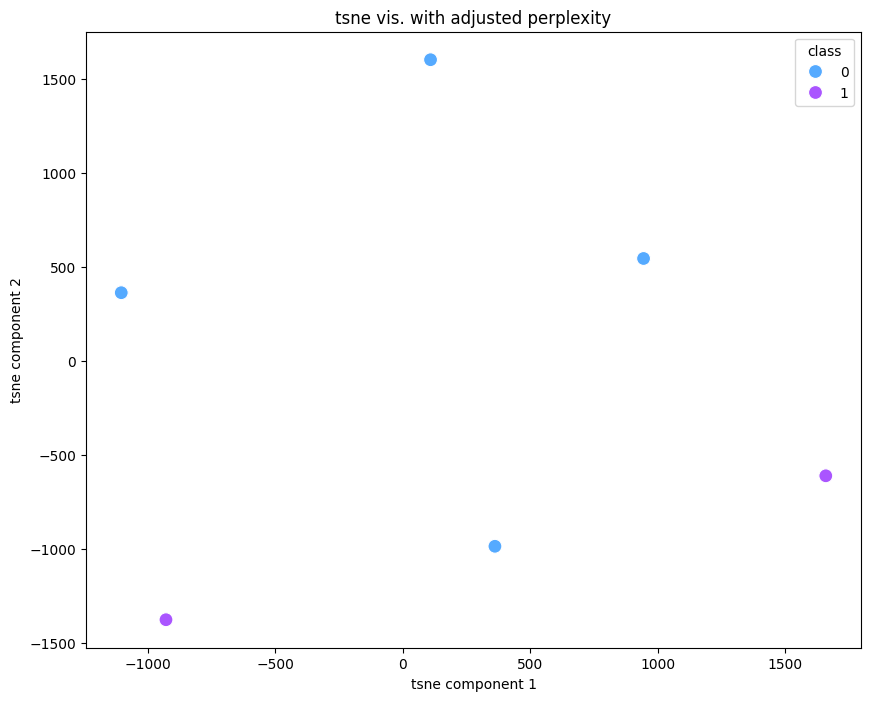

In [19]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_tsne[:, 0], y = x_tsne[:, 1], hue = df['label'], palette = 'cool', s = 100)
plt.title("tsne vis. with adjusted perplexity")
plt.xlabel("tsne component 1")
plt.ylabel("tsne component 2")
plt.legend(title = "class")
plt.show()

In [23]:
train_df = pd.read_csv('data/CT24_checkworthy_english/CT24_checkworthy_english/CT24_checkworthy_english_train.tsv', delimiter = '\t')
val_df = pd.read_csv('data/CT24_checkworthy_english/CT24_checkworthy_english/CT24_checkworthy_english_dev.tsv', delimiter = '\t')

In [24]:
train_df.shape

(22501, 3)

In [25]:
val_df.shape

(1032, 3)

In [34]:
val_df.columns

Index(['Sentence_id', 'Text', 'class_label'], dtype='object')

<Axes: xlabel='class_label', ylabel='count'>

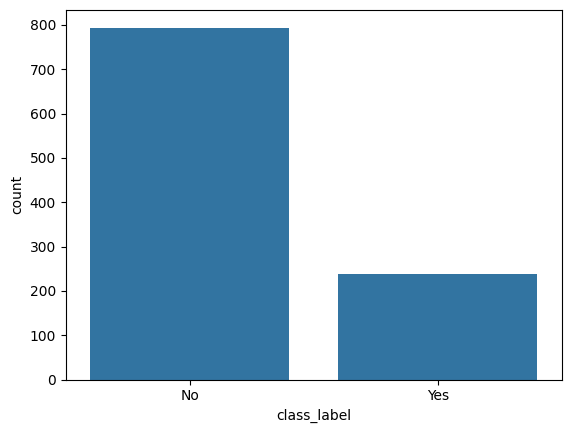

In [53]:
sns.countplot(x = val_df['class_label'])

In [28]:
# best n_component
def bestComponent_value(df):
    for i in range(2, len(df.columns)):
        num_of_data = df.loc[:,df.columns].values
        pca = PCA(n_components = i)
        pca.fit_transform(num_of_data)
        print(f"compinents = {i}, {pca.explained_variance_ration_.sum()}")


In [30]:
# bestComponent_value(val_df)

In [31]:
# pca
val_df_vectorize = TfidfVectorizer()
X = val_df_vectorize.fit_transform(val_df['Text']).toarray()
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)

In [33]:
x_pca[0]

array([-0.07017639, -0.19437358])

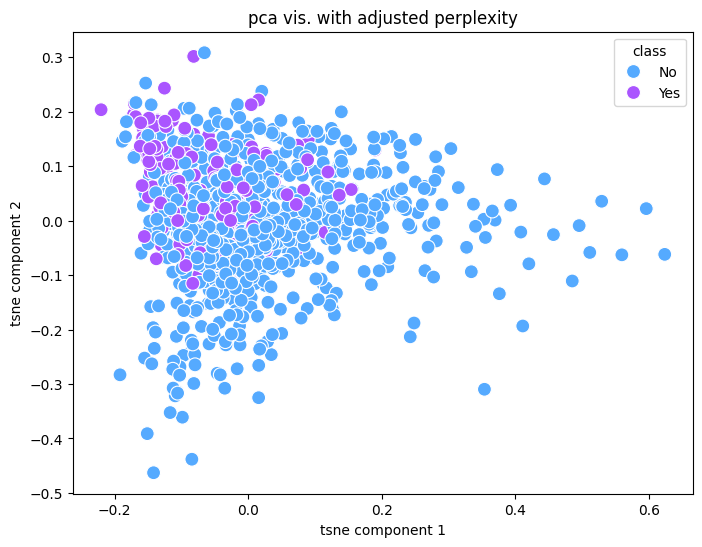

In [40]:
# plot the data points
plt.figure(figsize = (8,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue = val_df['class_label'], palette = 'cool', s = 100)
plt.title("pca vis. with adjusted perplexity")
plt.xlabel("tsne component 1")
plt.ylabel("tsne component 2")
plt.legend(title = "class")
plt.show()

In [36]:
# tsne
tsne = TSNE(n_components = 2, random_state = 42)
x_tsne = tsne.fit_transform(X)

In [37]:
x_tsne[0]

array([12.820888, -8.042631], dtype=float32)

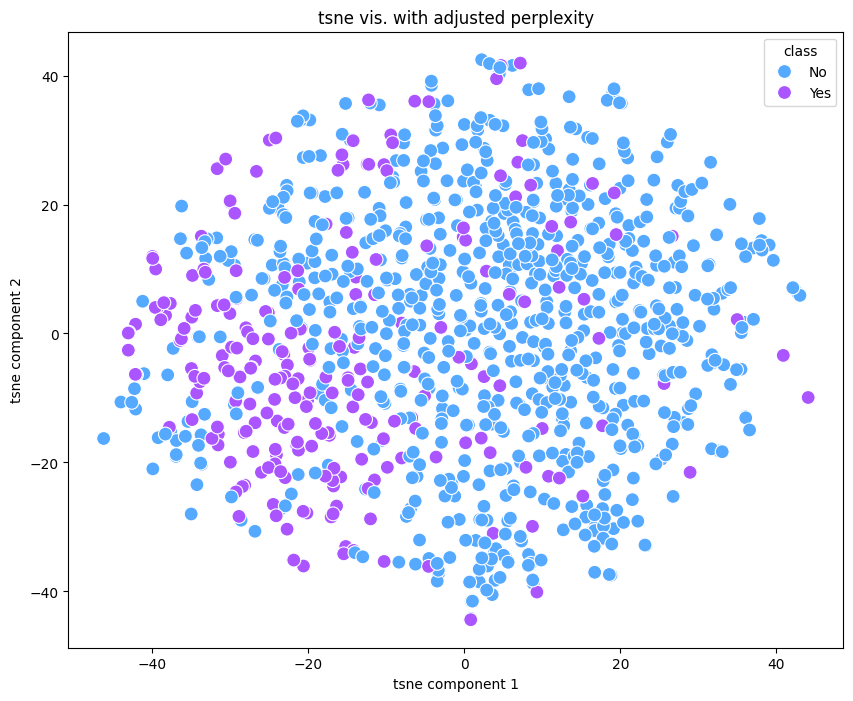

In [39]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_tsne[:, 0], y = x_tsne[:, 1], hue = val_df['class_label'], palette = 'cool', s = 100)
plt.title("tsne vis. with adjusted perplexity")
plt.xlabel("tsne component 1")
plt.ylabel("tsne component 2")
plt.legend(title = "class")
plt.show()